In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# !pip install seaborn
import seaborn as sns
import copy

In [10]:
experiments1 = os.listdir("experiments")
experiments1 = [exp for exp in experiments1 if exp.find("task1")>=0 and exp.find("clean")>=0]
experiments = sorted(experiments1)
experiments

['task1_exp_30-04_L5-8_mask-3_person_accessory_clean',
 'task1_exp_30-04_L5-8_mask-3_person_accessory_clean_NO_caption',
 'task1_exp_30-04_L5-8_mask-3_person_accessory_clean_caption',
 'task1_exp_30-04_L5-8_mask-4_person_accessory_clean',
 'task1_exp_30-04_L5-8_mask-4_person_accessory_clean_NO_caption',
 'task1_exp_30-04_L5-8_mask-4_person_accessory_clean_caption',
 'task1_exp_30-04_mask-3_person_accessory_clean',
 'task1_exp_30-04_mask-3_person_accessory_clean_NO_caption',
 'task1_exp_30-04_mask-3_person_accessory_clean_caption',
 'task1_exp_30-04_mask-4_person_accessory_clean',
 'task1_exp_30-04_mask-4_person_accessory_clean_NO_caption',
 'task1_exp_30-04_mask-4_person_accessory_clean_caption']

In [11]:
experiments2 = os.listdir("experiments")
experiments2 = [exp for exp in experiments2 if exp.find("task2")>=0 and exp.find("clean")>=0]
experiments.extend(sorted(experiments2))
experiments

['task1_exp_30-04_L5-8_mask-3_person_accessory_clean',
 'task1_exp_30-04_L5-8_mask-3_person_accessory_clean_NO_caption',
 'task1_exp_30-04_L5-8_mask-3_person_accessory_clean_caption',
 'task1_exp_30-04_L5-8_mask-4_person_accessory_clean',
 'task1_exp_30-04_L5-8_mask-4_person_accessory_clean_NO_caption',
 'task1_exp_30-04_L5-8_mask-4_person_accessory_clean_caption',
 'task1_exp_30-04_mask-3_person_accessory_clean',
 'task1_exp_30-04_mask-3_person_accessory_clean_NO_caption',
 'task1_exp_30-04_mask-3_person_accessory_clean_caption',
 'task1_exp_30-04_mask-4_person_accessory_clean',
 'task1_exp_30-04_mask-4_person_accessory_clean_NO_caption',
 'task1_exp_30-04_mask-4_person_accessory_clean_caption',
 'task2_exp_30-04_L5-8_mask-3_diningtable_objects_clean',
 'task2_exp_30-04_L5-8_mask-3_diningtable_objects_clean_NO_caption',
 'task2_exp_30-04_L5-8_mask-3_diningtable_objects_clean_caption',
 'task2_exp_30-04_L5-8_mask-4_diningtable_objects_clean',
 'task2_exp_30-04_L5-8_mask-4_diningtable_o

In [12]:
experiments3 = os.listdir("experiments")
experiments3 = [exp for exp in experiments3 if exp.find("task4")>=0 and exp.find("clean")>=0]
experiments.extend(sorted(experiments3))
experiments

['task1_exp_30-04_L5-8_mask-3_person_accessory_clean',
 'task1_exp_30-04_L5-8_mask-3_person_accessory_clean_NO_caption',
 'task1_exp_30-04_L5-8_mask-3_person_accessory_clean_caption',
 'task1_exp_30-04_L5-8_mask-4_person_accessory_clean',
 'task1_exp_30-04_L5-8_mask-4_person_accessory_clean_NO_caption',
 'task1_exp_30-04_L5-8_mask-4_person_accessory_clean_caption',
 'task1_exp_30-04_mask-3_person_accessory_clean',
 'task1_exp_30-04_mask-3_person_accessory_clean_NO_caption',
 'task1_exp_30-04_mask-3_person_accessory_clean_caption',
 'task1_exp_30-04_mask-4_person_accessory_clean',
 'task1_exp_30-04_mask-4_person_accessory_clean_NO_caption',
 'task1_exp_30-04_mask-4_person_accessory_clean_caption',
 'task2_exp_30-04_L5-8_mask-3_diningtable_objects_clean',
 'task2_exp_30-04_L5-8_mask-3_diningtable_objects_clean_NO_caption',
 'task2_exp_30-04_L5-8_mask-3_diningtable_objects_clean_caption',
 'task2_exp_30-04_L5-8_mask-4_diningtable_objects_clean',
 'task2_exp_30-04_L5-8_mask-4_diningtable_o

In [13]:
len(experiments)

36

In [14]:
# add new columns with results
metrics_col = []
all_exp = pd.read_csv(f"experiments/{experiments[0]}/test_scores.csv")
all_exp = all_exp.rename(columns={"test_score": experiments[0]+"_acc"})
metrics_col.append(experiments[0]+"_acc")
for exp in experiments[1:]:
    exp_scores = pd.read_csv(f"experiments/{exp}/test_scores.csv")
    all_exp[exp+"_acc"] = exp_scores["test_score"]
    metrics_col.append(exp+"_acc")
#     all_exp = pd.concat([all_exp, exp_scores])
all_exp["exp_name"] = all_exp["model_name"] + "_" + all_exp["object"] + "_" + all_exp["token_strategy"]
all_exp = all_exp.drop(columns=['model'])

In [15]:
len(all_exp)

40

In [8]:
metrics_col

['task1_exp_30-04_L5-8_mask-3_person_accessory_clean_acc',
 'task1_exp_30-04_L5-8_mask-3_person_accessory_clean_caption_acc',
 'task1_exp_30-04_L5-8_mask-4_person_accessory_clean_acc',
 'task1_exp_30-04_L5-8_mask-4_person_accessory_clean_caption_acc',
 'task1_exp_30-04_mask-3_person_accessory_clean_acc',
 'task1_exp_30-04_mask-3_person_accessory_clean_caption_acc',
 'task1_exp_30-04_mask-4_person_accessory_clean_acc',
 'task1_exp_30-04_mask-4_person_accessory_clean_caption_acc',
 'task2_exp_30-04_L5-8_mask-3_diningtable_objects_clean_acc',
 'task2_exp_30-04_L5-8_mask-3_diningtable_objects_clean_caption_acc',
 'task2_exp_30-04_L5-8_mask-4_diningtable_objects_clean_acc',
 'task2_exp_30-04_L5-8_mask-4_diningtable_objects_clean_caption_acc',
 'task2_exp_30-04_mask-3_diningtable_objects_clean_acc',
 'task2_exp_30-04_mask-3_diningtable_objects_clean_caption_acc',
 'task2_exp_30-04_mask-4_diningtable_objects_clean_acc',
 'task2_exp_30-04_mask-4_diningtable_objects_clean_caption_acc',
 'task4_

In [ ]:
# average by token (4) , obj group (2) and layer (5) = 8 lines instead of 160 

In [18]:
# add new columns with results
all_exp = pd.read_csv(f"experiments/{experiments[0]}/test_scores.csv")
for exp in experiments[1:]:
    exp_scores = pd.read_csv(f"experiments/{exp}/test_scores.csv")
    all_exp = pd.concat([all_exp, exp_scores])
all_exp["exp_name"] = all_exp["model_name"] + "_" + all_exp["object"] + "_" + all_exp["token_strategy"]
all_exp = all_exp.drop(columns=['model'])
all_exp['dataset'] = all_exp["model_name"].apply(lambda x: x[:7] if x[4] == '4' else x[:5])
all_exp = all_exp.sort_values(by="hidden_state_layer")
# all_exp["hidden_state_layer"] = all_exp["hidden_state_layer"].astype(str)
all_exp

,model_name,object,token_strategy,hidden_state_layer,test_score,loss,exp_name,dataset
0,task1_exp_30-04_L5-8_mask-3_person_accessory_c...,main,max_image,2,0.351485,1.355567,task1_exp_30-04_L5-8_mask-3_person_accessory_c...,task1
31,task4_5_exp_30-04_L5-8_mask-4_dining_person_fo...,second,random_obj,2,0.434343,1.218108,task4_5_exp_30-04_L5-8_mask-4_dining_person_fo...,task4_5
30,task4_5_exp_30-04_L5-8_mask-4_dining_person_fo...,main,random_obj,2,0.454545,1.160029,task4_5_exp_30-04_L5-8_mask-4_dining_person_fo...,task4_5
21,task4_5_exp_30-04_L5-8_mask-4_dining_person_fo...,second,min_obj,2,0.449495,1.261072,task4_5_exp_30-04_L5-8_mask-4_dining_person_fo...,task4_5
20,task4_5_exp_30-04_L5-8_mask-4_dining_person_fo...,main,min_obj,2,0.404040,1.195682,task4_5_exp_30-04_L5-8_mask-4_dining_person_fo...,task4_5
...,...,...,...,...,...,...,...,...
28,task1_exp_30-04_mask-3_person_accessory_clean_...,main,min_obj,11,0.500000,1.138446,task1_exp_30-04_mask-3_person_accessory_clean_...,task1
18,task4_5_exp_30-04_mask-3_dining_person_food_clean,main,max_obj,11,0.543147,1.236095,task4_5_exp_30-04_mask-3_dining_person_food_cl...,task4_5
19,task4_5_exp_30-04_mask-3_dining_person_food_clean,second,max_obj,11,0.588832,1.047076,task4_5_exp_30-04_mask-3_dining_person_food_cl...,task4_5
39,task4_5_exp_30-04_mask-3_dining_person_food_cl...,second,random_obj,11,0.670051,0.907403,task4_5_exp_30-04_mask-3_dining_person_food_cl...,task4_5


In [19]:
def get_dataset_name(task):
    if task=="task1":
        return "Person-Accessory"
    elif task=="task2":
        return "Dining table-Kitchenware"
    elif task=="task4_5":
        return "Person/Dining table-Food"
all_exp['dataset'] = all_exp['dataset'].apply(lambda x: get_dataset_name(x))

In [21]:
group_obj = all_exp[all_exp["token_strategy"]!="max_image"].groupby(["dataset", "object", "hidden_state_layer"])
group_image = all_exp[all_exp["token_strategy"]=="max_image"].groupby(["dataset", "hidden_state_layer"])

In [22]:
obj_layer_mean = group_obj.agg(np.mean).sort_values(by=["dataset", "object", "hidden_state_layer"])["test_score"]
obj_layer_mean_df = obj_layer_mean.reset_index()
image_layer_mean = group_image.agg(np.mean).sort_values(by=["dataset","hidden_state_layer"])["test_score"]
image_layer_mean_df = image_layer_mean.reset_index()

/tmp/ipykernel_16878/511896795.py:1: FutureWarning: The operation <function mean at 0x7f065c1454c0> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  obj_layer_mean = group_obj.agg(np.mean).sort_values(by=["dataset", "object", "hidden_state_layer"])["test_score"]
/tmp/ipykernel_16878/511896795.py:3: FutureWarning: The operation <function mean at 0x7f065c1454c0> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  image_layer_mean = group_image.agg(np.mean).sort_values(by=["dataset","hidden_state_layer"])["test_score"]


In [23]:
obj_layer_mean_df.head()

,dataset,object,hidden_state_layer,test_score
0,Dining table-Kitchenware,main,2,0.275507
1,Dining table-Kitchenware,main,3,0.274633
2,Dining table-Kitchenware,main,4,0.302586
3,Dining table-Kitchenware,main,5,0.297170
4,Dining table-Kitchenware,main,6,0.310797


In [24]:
image_layer_mean_df.head()

,dataset,hidden_state_layer,test_score
0,Dining table-Kitchenware,2,0.267296
1,Dining table-Kitchenware,3,0.270964
2,Dining table-Kitchenware,4,0.323375
3,Dining table-Kitchenware,5,0.272275
4,Dining table-Kitchenware,6,0.232180


In [25]:
image_layer_mean_df[image_layer_mean_df["dataset"]=="Person/Dining table-Food"]

,dataset,hidden_state_layer,test_score
20,Person/Dining table-Food,2,0.340916
21,Person/Dining table-Food,3,0.400408
22,Person/Dining table-Food,4,0.409264
23,Person/Dining table-Food,5,0.297888
24,Person/Dining table-Food,6,0.258230
25,Person/Dining table-Food,7,0.252327
26,Person/Dining table-Food,8,0.247691
27,Person/Dining table-Food,9,0.248107
28,Person/Dining table-Food,10,0.283963
29,Person/Dining table-Food,11,0.480178


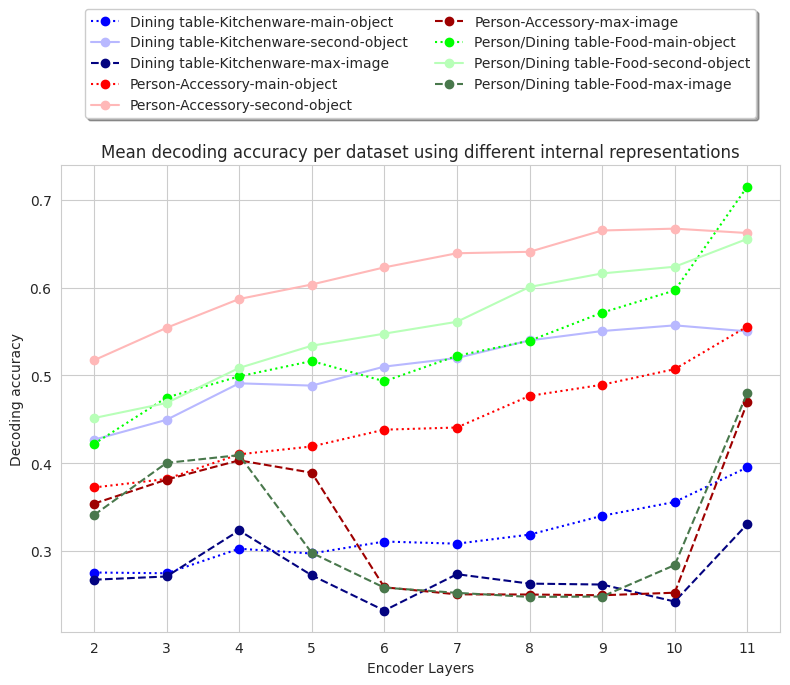

In [251]:
obj_layer_mean_df["hidden_state_layer"] = obj_layer_mean_df["hidden_state_layer"].astype(str)
image_layer_mean_df["hidden_state_layer"] = image_layer_mean_df["hidden_state_layer"].astype(str)

color_map_task_obj = {"Person-Accessory": {"main": '#ff0000', "second": '#ffb8b8',  "max-image": '#9e0000'},
                      "Dining table-Kitchenware": {"main": '#0000ff', "second": '#b8b8ff',  "max-image": '#030380'}, 
                      "Person/Dining table-Food": {"main": '#00ff00', "second": '#b8ffb8',  "max-image": '#49784c'}}

plt.figure(figsize=(8,7), tight_layout=True)
plt.grid(visible=True)
for task in obj_layer_mean_df["dataset"].unique().tolist():
    for object_, line_style in zip(obj_layer_mean_df["object"].unique().tolist(), ["dotted","solid"]):
        plt.plot(obj_layer_mean_df[(obj_layer_mean_df["dataset"]==task) & (obj_layer_mean_df["object"]==object_)]["hidden_state_layer"], 
                 obj_layer_mean_df[(obj_layer_mean_df["dataset"]==task) & (obj_layer_mean_df["object"]==object_)]["test_score"], 
                 label=f"{task}-{object_}-object",
                 marker='o',
                 linestyle=line_style,
                 linewidth=1.5,
                 color=color_map_task_obj[task][object_])
    plt.plot(image_layer_mean_df[image_layer_mean_df["dataset"]==task]["hidden_state_layer"], 
             image_layer_mean_df[image_layer_mean_df["dataset"]==task]["test_score"], 
             label=f"{task}-max-image",
             marker='o',
             linestyle='dashed',
             linewidth=1.5,
             color=color_map_task_obj[task]['max-image'])
plt.xlabel('Encoder Layers')
plt.ylabel('Decoding accuracy')
plt.title('Mean decoding accuracy per dataset using different internal representations')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.35),
          ncol=2, fancybox=True, shadow=True)
plt.savefig("../figures/figure_mean_decoding_per_layer.png")
plt.show()

# What do I want to see?

### Does transformers have compositionality in tokens?
How can I prove? Accuracy of each task
* Per task (2 simple, 1 complex)
    * BEST score main object
    * BEST score second object
    * Global BEST score (avg of both)

Scores are above chance but low

### Which layers are best to use?
* mean scores per task, object and per layer (6 lines)

### Does the mask selection influences the results?
* attn based X no attention

### Does the dataset influences the results?
* Caption filter
* Non caption filter



In [31]:
experiments

['task1_exp_30-04_L5-8_mask-3_person_accessory_clean',
 'task1_exp_30-04_L5-8_mask-3_person_accessory_clean_NO_caption',
 'task1_exp_30-04_L5-8_mask-3_person_accessory_clean_caption',
 'task1_exp_30-04_L5-8_mask-4_person_accessory_clean',
 'task1_exp_30-04_L5-8_mask-4_person_accessory_clean_NO_caption',
 'task1_exp_30-04_L5-8_mask-4_person_accessory_clean_caption',
 'task1_exp_30-04_mask-3_person_accessory_clean',
 'task1_exp_30-04_mask-3_person_accessory_clean_NO_caption',
 'task1_exp_30-04_mask-3_person_accessory_clean_caption',
 'task1_exp_30-04_mask-4_person_accessory_clean',
 'task1_exp_30-04_mask-4_person_accessory_clean_NO_caption',
 'task1_exp_30-04_mask-4_person_accessory_clean_caption',
 'task2_exp_30-04_L5-8_mask-3_diningtable_objects_clean',
 'task2_exp_30-04_L5-8_mask-3_diningtable_objects_clean_NO_caption',
 'task2_exp_30-04_L5-8_mask-3_diningtable_objects_clean_caption',
 'task2_exp_30-04_L5-8_mask-4_diningtable_objects_clean',
 'task2_exp_30-04_L5-8_mask-4_diningtable_o

In [51]:
def get_caption_filter(model_name):
    if model_name.find("clean_caption")>=0:
        return "(cap)"
    elif model_name.find("clean_NO_caption")>=0:
        return "(no cap)"
    else:
        return "(mixed)"
    
[(exp,get_caption_filter(exp)) for exp in experiments][:10]

[('task1_exp_30-04_L5-8_mask-3_person_accessory_clean', '(mixed)'),
 ('task1_exp_30-04_L5-8_mask-3_person_accessory_clean_NO_caption', '(no cap)'),
 ('task1_exp_30-04_L5-8_mask-3_person_accessory_clean_caption', '(cap)'),
 ('task1_exp_30-04_L5-8_mask-4_person_accessory_clean', '(mixed)'),
 ('task1_exp_30-04_L5-8_mask-4_person_accessory_clean_NO_caption', '(no cap)'),
 ('task1_exp_30-04_L5-8_mask-4_person_accessory_clean_caption', '(cap)'),
 ('task1_exp_30-04_mask-3_person_accessory_clean', '(mixed)'),
 ('task1_exp_30-04_mask-3_person_accessory_clean_NO_caption', '(no cap)'),
 ('task1_exp_30-04_mask-3_person_accessory_clean_caption', '(cap)'),
 ('task1_exp_30-04_mask-4_person_accessory_clean', '(mixed)')]

In [154]:
def get_mask_type(model_name):
    start_pos = model_name.index("mask-")
    return model_name[start_pos+5:start_pos+6]

get_mask_type("task1_exp_30-04_mask-3_person_accessory_clean")

'3'

In [155]:
# add new columns with results
results_table = pd.read_csv(f"experiments/{experiments[0]}/test_scores.csv")
# results_table = results_table.rename(columns={"test_score": experiments[0]+"_acc"})
results_table['dataset'] = results_table["model_name"].apply(lambda x: x[:7] if x[4] == 4 else x[:5])
# results_table

In [156]:
# metrics_col.append(experiments[0]+"_acc")
for exp in experiments[1:]:
    exp_scores = pd.read_csv(f"experiments/{exp}/test_scores.csv")
    results_table = pd.concat([results_table, exp_scores])
# results_table["exp_name"] = results_table["model_name"] + "_" + all_exp["object"] + "_" + all_exp["token_strategy"]
results_table['dataset'] = results_table["model_name"].apply(lambda x: x[:7] if x[4] == '4' else x[:5])
results_table['dataset'] = results_table['dataset'].apply(lambda x: get_dataset_name(x))
# results_table['caption_filter'] = "(mixed)"
results_table['caption_filter'] = results_table["model_name"].apply(lambda x: get_caption_filter(x))
results_table['mask_type'] = results_table["model_name"].apply(lambda x: get_mask_type(x))
results_table = results_table.drop(columns=['model'])
results_table

,model_name,object,token_strategy,hidden_state_layer,test_score,loss,dataset,caption_filter,mask_type
0,task1_exp_30-04_L5-8_mask-3_person_accessory_c...,main,max_image,2,0.351485,1.355567,Person-Accessory,(mixed),3
1,task1_exp_30-04_L5-8_mask-3_person_accessory_c...,second,max_image,2,0.391089,1.326866,Person-Accessory,(mixed),3
2,task1_exp_30-04_L5-8_mask-3_person_accessory_c...,main,max_image,5,0.393564,1.272286,Person-Accessory,(mixed),3
3,task1_exp_30-04_L5-8_mask-3_person_accessory_c...,second,max_image,5,0.391089,1.295093,Person-Accessory,(mixed),3
4,task1_exp_30-04_L5-8_mask-3_person_accessory_c...,main,max_image,6,0.259901,1.386129,Person-Accessory,(mixed),3
...,...,...,...,...,...,...,...,...,...
35,task4_5_exp_30-04_mask-4_dining_person_food_cl...,second,random_obj,9,0.606061,0.892669,Person/Dining table-Food,(cap),4
36,task4_5_exp_30-04_mask-4_dining_person_food_cl...,main,random_obj,10,0.651515,0.761518,Person/Dining table-Food,(cap),4
37,task4_5_exp_30-04_mask-4_dining_person_food_cl...,second,random_obj,10,0.696970,0.852475,Person/Dining table-Food,(cap),4
38,task4_5_exp_30-04_mask-4_dining_person_food_cl...,main,random_obj,11,0.797980,0.580469,Person/Dining table-Food,(cap),4


In [157]:
results_table_group = results_table[["dataset", "object", "token_strategy","test_score"]]
results_table_group = results_table_group.groupby(["dataset", "object", "token_strategy"])
results_table_group.first()

test_score
dataset                  object token_strategy            
Dining table-Kitchenware main   max_image         0.267296
                                max_obj           0.286164
                                min_obj           0.298742
                                random_obj        0.264151
                         second max_image         0.279874
                                max_obj           0.399371
                                min_obj           0.437107
                                random_obj        0.421384
Person-Accessory         main   max_image         0.351485
                                max_obj           0.356436
                                min_obj           0.391089
                                random_obj        0.371287
                         second max_image         0.391089
                                max_obj           0.514852
                                min_obj           0.527228
                                random_obj        0.556931
Person/Dining table-Food main   max_image         0.324873
                                max_obj           0.375635
                                min_obj           0.477157
                                random_obj        0.385787
                         second max_image         0.360406
                                max_obj           0.512690
                                min_obj           0.426396
                                random_obj        0.487310

In [158]:
results_table_group.agg(np.max)

test_score
dataset                  object token_strategy            
Dining table-Kitchenware main   max_image         0.352201
                                max_obj           0.389937
                                min_obj           0.468553
                                random_obj        0.427673
                         second max_image         0.352201
                                max_obj           0.584906
                                min_obj           0.600629
                                random_obj        0.669811
Person-Accessory         main   max_image         0.512376
                                max_obj           0.606436
                                min_obj           0.660891
                                random_obj        0.621287
                         second max_image         0.507426
                                max_obj           0.693069
                                min_obj           0.698020
                                random_obj        0.725248
Person/Dining table-Food main   max_image         0.522843
                                max_obj           0.593909
                                min_obj           0.822335
                                random_obj        0.803030
                         second max_image         0.484848
                                max_obj           0.670051
                                min_obj           0.707071
                                random_obj        0.696970

In [159]:
results_table_group = results_table_group.agg(np.max).reset_index()

In [160]:
results_table_group["dataset_object"] = results_table_group["dataset"] + "-" + results_table_group["object"]
# add layer number to the best score as string
results_table_group["layer_test_score"] = ""
for idx, row in results_table_group.iterrows():
    temp = results_table[(results_table["dataset"]==row["dataset"]) & (results_table["object"]==row["object"]) & (results_table["token_strategy"]==row["token_strategy"]) & (results_table["test_score"]==row["test_score"])]
    temp = temp.sort_values(by=["hidden_state_layer"])
    best_layer = temp['hidden_state_layer'].values[-1]
    best_mask_type = temp['mask_type'].values[-1]
    best_filter = temp['caption_filter'].values[-1]
#     results_table_group.at[idx, "layer_test_score"] = f"{str(round(row['test_score'],3))} ({best_layer})({best_mask_type}){best_filter}"
    results_table_group.at[idx, "layer_test_score"] = f"{str(round(row['test_score'],3))} ({best_layer})"
results_table_group.head()    

,dataset,object,token_strategy,test_score,dataset_object,layer_test_score
0,Dining table-Kitchenware,main,max_image,0.352201,Dining table-Kitchenware-main,0.352 (11)
1,Dining table-Kitchenware,main,max_obj,0.389937,Dining table-Kitchenware-main,0.39 (11)
2,Dining table-Kitchenware,main,min_obj,0.468553,Dining table-Kitchenware-main,0.469 (11)
3,Dining table-Kitchenware,main,random_obj,0.427673,Dining table-Kitchenware-main,0.428 (11)
4,Dining table-Kitchenware,second,max_image,0.352201,Dining table-Kitchenware-second,0.352 (11)


In [161]:
# compute average between best main and second
mean_task_result = {"dataset": [], "object": [], "token_strategy": [], "test_score": [], "dataset_object":[],  "layer_test_score": []}
task_list = results_table_group["dataset"].unique().tolist()
for task in task_list:
    for tokens in results_table_group["token_strategy"].unique().tolist():
        temp = results_table_group[(results_table_group["dataset"]==task) & (results_table_group["token_strategy"]==tokens)]
        mean_score_task_token = np.mean(temp["test_score"].values)        
        mean_task_result["dataset"].append(task)
        mean_task_result["object"].append("main-second")
        mean_task_result["token_strategy"].append(tokens)
        mean_task_result["test_score"].append(mean_score_task_token)
        mean_task_result["dataset_object"].append(f"{task} (mean)")
        mean_task_result["layer_test_score"].append(str(round(mean_score_task_token,3)))
# print(mean_task_result)
results_table_group = pd.concat([results_table_group, pd.DataFrame(mean_task_result)])
results_table_group.tail()

,dataset,object,token_strategy,test_score,dataset_object,layer_test_score
7,Person-Accessory,main-second,random_obj,0.673267,Person-Accessory (mean),0.673
8,Person/Dining table-Food,main-second,max_image,0.503846,Person/Dining table-Food (mean),0.504
9,Person/Dining table-Food,main-second,max_obj,0.631980,Person/Dining table-Food (mean),0.632
10,Person/Dining table-Food,main-second,min_obj,0.764703,Person/Dining table-Food (mean),0.765
11,Person/Dining table-Food,main-second,random_obj,0.750000,Person/Dining table-Food (mean),0.75


In [60]:
table1 = results_table_group.pivot(index=["dataset_object"], columns=["token_strategy"], values=["layer_test_score"])
show_order = ["Person-Accessory-main", 
              "Person-Accessory-second", 
              "Person-Accessory (mean)",
              "Dining table-Kitchenware-main", 
              "Dining table-Kitchenware-second", 
              "Dining table-Kitchenware (mean)",
              "Person/Dining table-Food-main", 
              "Person/Dining table-Food-second", 
              "Person/Dining table-Food (mean)"]
table1 = table1.filter(items=show_order, axis=0)
table1

layer_test_score                          \
token_strategy                         max_image     max_obj     min_obj   
dataset_object                                                             
Person-Accessory-main                 0.512 (11)  0.606 (11)  0.661 (11)   
Person-Accessory-second               0.507 (11)  0.693 (10)   0.698 (9)   
Person-Accessory (mean)                     0.51        0.65       0.679   
Dining table-Kitchenware-main         0.352 (11)   0.39 (11)  0.469 (11)   
Dining table-Kitchenware-second       0.352 (11)  0.585 (10)   0.601 (9)   
Dining table-Kitchenware (mean)            0.352       0.487       0.535   
Person/Dining table-Food-main         0.523 (11)  0.594 (11)  0.822 (11)   
Person/Dining table-Food-second       0.485 (11)    0.67 (9)  0.707 (11)   
Person/Dining table-Food (mean)            0.504       0.632       0.765   

                                             
token_strategy                   random_obj  
dataset_object                               
Person-Accessory-main            0.621 (11)  
Person-Accessory-second          0.725 (10)  
Person-Accessory (mean)               0.673  
Dining table-Kitchenware-main    0.428 (11)  
Dining table-Kitchenware-second   0.67 (10)  
Dining table-Kitchenware (mean)       0.549  
Person/Dining table-Food-main    0.803 (11)  
Person/Dining table-Food-second  0.697 (11)  
Person/Dining table-Food (mean)        0.75

In [62]:
table1.to_csv("../results/table1_best_score_by_token_dataset.csv")

### scatterplot all models
* task
* object
* token_strategy
* mask type
* caption/no caption

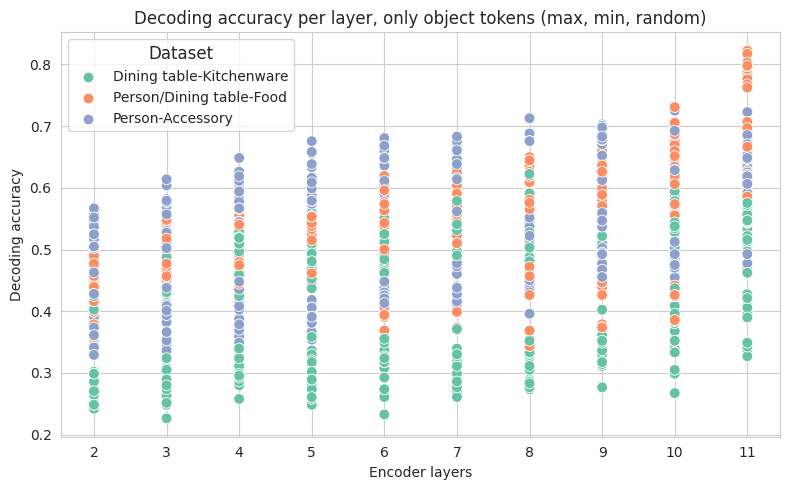

In [241]:
# it gets easier to decode main object as the layers go deep? Green moving from mostly bottom to top
results_table["token-object"] = results_table["token_strategy"] +"-"+results_table["object"]
results_table["layer"] = results_table["hidden_state_layer"].astype(str)
results_table = results_table.sort_values(by="hidden_state_layer")
plt.figure(figsize=(8,5), tight_layout=True)
plt.grid(visible=True)
ax = sns.scatterplot(data=results_table[results_table["token_strategy"]!="max_image"], x='layer', y='test_score', 
                     hue='dataset', palette='Set2', s=60)
ax.set(title="Decoding accuracy per layer, only object tokens (max, min, random)", xlabel='Encoder layers', ylabel='Decoding accuracy')
ax.legend(title='Dataset', title_fontsize = 12) 
plt.savefig("../figures/figure_scatter_decoding_acc.png")
plt.show()

In [169]:
# Remove the first "mixed" dataset because it mixed images from both caption and not caption
# Remove max image token because the object selection strategy doesn't contribute to the result
# Remove random object because I'm comparing the same model with only different mask types and caption filter
#        and "random object" even if the selected object is the same, the result can be totally different because of the token
#        max and min token should be the same if object selected by both methods is the same
mask_type_data = results_table[(results_table["caption_filter"]=='(mixed)') & \
                               (~results_table["token_strategy"].isin(["max_image", "random_obj"]))  \
                               ]
# (results_table["hidden_state_layer"].astype(int)>=9)

In [170]:
mask_type_data

,model_name,object,token_strategy,hidden_state_layer,test_score,loss,dataset,caption_filter,mask_type
10,task1_exp_30-04_L5-8_mask-3_person_accessory_c...,main,max_obj,2,0.356436,1.352943,Person-Accessory,(mixed),3
11,task1_exp_30-04_L5-8_mask-3_person_accessory_c...,second,max_obj,2,0.514852,1.083078,Person-Accessory,(mixed),3
12,task1_exp_30-04_L5-8_mask-3_person_accessory_c...,main,max_obj,5,0.391089,1.279627,Person-Accessory,(mixed),3
13,task1_exp_30-04_L5-8_mask-3_person_accessory_c...,second,max_obj,5,0.608911,0.925527,Person-Accessory,(mixed),3
14,task1_exp_30-04_L5-8_mask-3_person_accessory_c...,main,max_obj,6,0.450495,1.273583,Person-Accessory,(mixed),3
...,...,...,...,...,...,...,...,...,...
25,task4_5_exp_30-04_mask-4_dining_person_food_clean,second,min_obj,9,0.545455,1.006588,Person/Dining table-Food,(mixed),4
26,task4_5_exp_30-04_mask-4_dining_person_food_clean,main,min_obj,10,0.676768,0.813894,Person/Dining table-Food,(mixed),4
27,task4_5_exp_30-04_mask-4_dining_person_food_clean,second,min_obj,10,0.616162,0.937703,Person/Dining table-Food,(mixed),4
28,task4_5_exp_30-04_mask-4_dining_person_food_clean,main,min_obj,11,0.762626,0.650199,Person/Dining table-Food,(mixed),4


In [224]:
# difference between mask types for the same model, just different mask type?

mask_type_diff = mask_type_data[(mask_type_data["mask_type"]=='3')]
mask_type_diff["experiment_idx"] = mask_type_diff["dataset"]+"-"+mask_type_diff["object"]+"-"+mask_type_diff["token_strategy"]+"-"+mask_type_diff["hidden_state_layer"].astype(str)+"-"+mask_type_diff["caption_filter"]
mask_type_diff_ = mask_type_data[(mask_type_data["mask_type"]=='4')]
mask_type_diff_["experiment_idx"] = mask_type_diff_["dataset"]+"-"+mask_type_diff_["object"]+"-"+mask_type_diff_["token_strategy"]+"-"+mask_type_diff_["hidden_state_layer"].astype(str)+"-"+mask_type_diff_["caption_filter"]
assert len(mask_type_diff) == len(mask_type_diff_), "problem with filters"
mask_type_diff = mask_type_diff.join(mask_type_diff_[["experiment_idx", "dataset", "object", "token_strategy", "test_score", "hidden_state_layer", "caption_filter"]].set_index(["experiment_idx"]), on="experiment_idx", rsuffix="_attn")
mask_type_diff["Test score diff. (attention based - non-attentive)"] = mask_type_diff["test_score_attn"] - mask_type_diff["test_score"]
mask_type_diff = mask_type_diff.sort_values(by=["dataset"])
mask_type_diff.head()

/tmp/ipykernel_16878/176652296.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mask_type_diff["experiment_idx"] = mask_type_diff["dataset"]+"-"+mask_type_diff["object"]+"-"+mask_type_diff["token_strategy"]+"-"+mask_type_diff["hidden_state_layer"].astype(str)+"-"+mask_type_diff["caption_filter"]
/tmp/ipykernel_16878/176652296.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mask_type_diff_["experiment_idx"] = mask_type_diff_["dataset"]+"-"+mask_type_diff_["object"]+"-"+mask_type_diff_["token_strategy"

,model_name,object,token_strategy,hidden_state_layer,test_score,loss,dataset,caption_filter,mask_type,experiment_idx,dataset_attn,object_attn,token_strategy_attn,test_score_attn,hidden_state_layer_attn,caption_filter_attn,Test score diff. (attention based - non-attentive)
29,task2_exp_30-04_L5-8_mask-3_diningtable_object...,second,min_obj,8,0.569182,1.085316,Dining table-Kitchenware,(mixed),3,Dining table-Kitchenware-second-min_obj-8-(mixed),Dining table-Kitchenware,second,min_obj,0.534591,8,(mixed),-0.034591
27,task2_exp_30-04_L5-8_mask-3_diningtable_object...,second,min_obj,7,0.496855,1.141329,Dining table-Kitchenware,(mixed),3,Dining table-Kitchenware-second-min_obj-7-(mixed),Dining table-Kitchenware,second,min_obj,0.515723,7,(mixed),0.018868
26,task2_exp_30-04_L5-8_mask-3_diningtable_object...,main,min_obj,7,0.327044,1.380621,Dining table-Kitchenware,(mixed),3,Dining table-Kitchenware-main-min_obj-7-(mixed),Dining table-Kitchenware,main,min_obj,0.333333,7,(mixed),0.006289
25,task2_exp_30-04_L5-8_mask-3_diningtable_object...,second,min_obj,6,0.512579,1.178816,Dining table-Kitchenware,(mixed),3,Dining table-Kitchenware-second-min_obj-6-(mixed),Dining table-Kitchenware,second,min_obj,0.462264,6,(mixed),-0.050314
24,task2_exp_30-04_L5-8_mask-3_diningtable_object...,main,min_obj,6,0.336478,1.458194,Dining table-Kitchenware,(mixed),3,Dining table-Kitchenware-main-min_obj-6-(mixed),Dining table-Kitchenware,main,min_obj,0.317610,6,(mixed),-0.018868


In [225]:
mask_type_diff.sort_values(by=["Test score diff. (attention based - non-attentive)"], ascending=True).head()

,model_name,object,token_strategy,hidden_state_layer,test_score,loss,dataset,caption_filter,mask_type,experiment_idx,dataset_attn,object_attn,token_strategy_attn,test_score_attn,hidden_state_layer_attn,caption_filter_attn,Test score diff. (attention based - non-attentive)
11,task4_5_exp_30-04_L5-8_mask-3_dining_person_fo...,second,max_obj,2,0.512690,1.225665,Person/Dining table-Food,(mixed),3,Person/Dining table-Food-second-max_obj-2-(mixed),Person/Dining table-Food,second,max_obj,0.414141,2,(mixed),-0.098549
25,task4_5_exp_30-04_mask-3_dining_person_food_clean,second,min_obj,9,0.639594,0.874936,Person/Dining table-Food,(mixed),3,Person/Dining table-Food-second-min_obj-9-(mixed),Person/Dining table-Food,second,min_obj,0.545455,9,(mixed),-0.094139
18,task4_5_exp_30-04_L5-8_mask-3_dining_person_fo...,main,max_obj,8,0.456853,1.166372,Person/Dining table-Food,(mixed),3,Person/Dining table-Food-main-max_obj-8-(mixed),Person/Dining table-Food,main,max_obj,0.368687,8,(mixed),-0.088166
23,task4_5_exp_30-04_mask-3_dining_person_food_clean,second,min_obj,4,0.512690,1.177178,Person/Dining table-Food,(mixed),3,Person/Dining table-Food-second-min_obj-4-(mixed),Person/Dining table-Food,second,min_obj,0.434343,4,(mixed),-0.078347
14,task4_5_exp_30-04_mask-3_dining_person_food_clean,main,max_obj,9,0.446701,1.112529,Person/Dining table-Food,(mixed),3,Person/Dining table-Food-main-max_obj-9-(mixed),Person/Dining table-Food,main,max_obj,0.373737,9,(mixed),-0.072963


In [175]:
mask_type_diff.sort_values(by=["test_score_diff"], ascending=True).tail()

,model_name,object,token_strategy,hidden_state_layer,test_score,loss,dataset,caption_filter,mask_type,experiment_idx,dataset_attn,object_attn,token_strategy_attn,test_score_attn,hidden_state_layer_attn,caption_filter_attn,test_score_diff
20,task1_exp_30-04_mask-3_person_accessory_clean,main,min_obj,3,0.350000,1.343411,Person-Accessory,(mixed),3,Person-Accessory-main-min_obj-3-(mixed),Person-Accessory,main,min_obj,0.395000,3,(mixed),0.045000
28,task2_exp_30-04_mask-3_diningtable_objects_clean,main,min_obj,11,0.421384,1.409241,Dining table-Kitchenware,(mixed),3,Dining table-Kitchenware-main-min_obj-11-(mixed),Dining table-Kitchenware,main,min_obj,0.468553,11,(mixed),0.047170
15,task4_5_exp_30-04_mask-3_dining_person_food_clean,second,max_obj,9,0.588832,0.883082,Person/Dining table-Food,(mixed),3,Person/Dining table-Food-second-max_obj-9-(mixed),Person/Dining table-Food,second,max_obj,0.651515,9,(mixed),0.062683
11,task2_exp_30-04_L5-8_mask-3_diningtable_object...,second,max_obj,2,0.399371,1.267443,Dining table-Kitchenware,(mixed),3,Dining table-Kitchenware-second-max_obj-2-(mixed),Dining table-Kitchenware,second,max_obj,0.462264,2,(mixed),0.062893
26,task2_exp_30-04_mask-3_diningtable_objects_clean,main,min_obj,10,0.367925,1.419634,Dining table-Kitchenware,(mixed),3,Dining table-Kitchenware-main-min_obj-10-(mixed),Dining table-Kitchenware,main,min_obj,0.437107,10,(mixed),0.069182


/home/braian/anaconda3/envs/thesis-pytorch/lib/python3.9/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


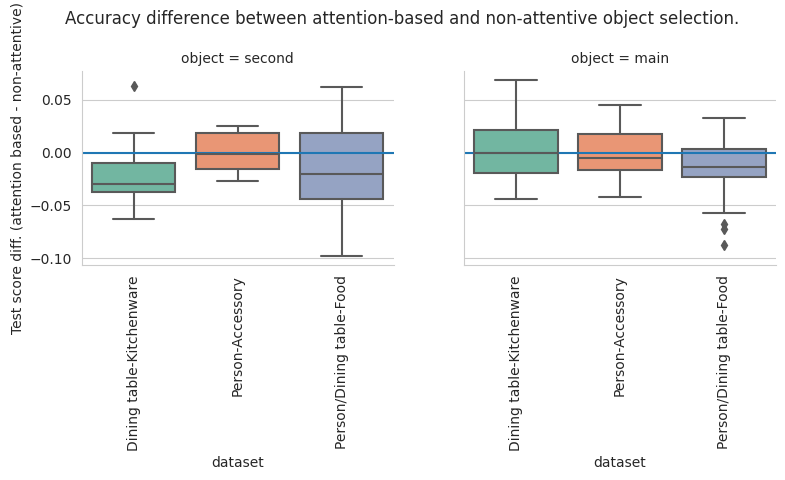

In [235]:
# plt.figure(figsize=(6,4), tight_layout=True)
sns.set_style('whitegrid')
fg = sns.FacetGrid(mask_type_diff, col="object", height=3.2, aspect=1.3, xlim=(-0.2, 0.2))
fg.fig.suptitle('Accuracy difference between attention-based and non-attentive object selection.')
ax = fg.map(sns.boxplot, 'dataset','Test score diff. (attention based - non-attentive)',  palette="Set2")
ax.tick_params(axis='x', rotation=90)
for ax in fg.axes.flat:
    ax.axhline(y=0)
# ax = sns.boxplot(data=mask_type_diff, x='test_score_diff', y='task', palette='Set2', linewidth=1.5)
# ax.set(title='Difference in accuracy between different object selection strategies', xlabel='', ylabel='Difference')
# ax.set_xlim([-0.2, 0.2])
plt.savefig("../figures/figure_boxplot_object_selection.png")
plt.show()

In [237]:
# difference between Captioning filter for the same model, just cap/nocap?
# Remove "max_image", "random_obj" tokens because comparing max_image with caption doesn't make sense
# and random_obj points to different tokens so the difference can be related to the token used and not the better data

caption_filter_diff = results_table[(results_table["caption_filter"]=='(mixed)') & \
                               (~results_table["token_strategy"].isin(["max_image", "random_obj"]))  \
                                  ]
caption_filter_diff["experiment_idx"] = caption_filter_diff["dataset"]+"-"+caption_filter_diff["object"]+"-"+caption_filter_diff["token_strategy"]+"-"+caption_filter_diff["hidden_state_layer"].astype(str)+"-"+caption_filter_diff["mask_type"]

caption_filter_diff_ = results_table[(results_table["caption_filter"]=='(cap)') & \
                               (~results_table["token_strategy"].isin(["max_image", "random_obj"]))  \
                                  ]
caption_filter_diff_["experiment_idx"] = caption_filter_diff_["dataset"]+"-"+caption_filter_diff_["object"]+"-"+caption_filter_diff_["token_strategy"]+"-"+caption_filter_diff_["hidden_state_layer"].astype(str)+"-"+caption_filter_diff_["mask_type"]

assert len(caption_filter_diff) == len(caption_filter_diff_), "problem with filters"
caption_filter_diff = caption_filter_diff.join(caption_filter_diff_[["experiment_idx", "test_score"]].set_index(["experiment_idx"]), on="experiment_idx", rsuffix="_caption")
caption_filter_diff["Test score diff. (attention based - non-attentive)"] = caption_filter_diff["test_score_caption"] - caption_filter_diff["test_score"]
caption_filter_diff = caption_filter_diff.sort_values(by=["dataset", "mask_type"])
caption_filter_diff["Obj. selection type"] = caption_filter_diff["mask_type"].apply(lambda x: "non-attentive" if x=='3' else 'attention-based')
caption_filter_diff.head()

/tmp/ipykernel_16878/2259925945.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  caption_filter_diff["experiment_idx"] = caption_filter_diff["dataset"]+"-"+caption_filter_diff["object"]+"-"+caption_filter_diff["token_strategy"]+"-"+caption_filter_diff["hidden_state_layer"].astype(str)+"-"+caption_filter_diff["mask_type"]
/tmp/ipykernel_16878/2259925945.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  caption_filter_diff_["experiment_idx"] = caption_filter_diff_["dataset"]+"-"+caption_filter_diff_["ob

,model_name,object,token_strategy,hidden_state_layer,test_score,loss,dataset,caption_filter,mask_type,token-object,layer,experiment_idx,test_score_caption,Test score diff. (attention based - non-attentive),Obj. selection type
10,task2_exp_30-04_L5-8_mask-3_diningtable_object...,main,max_obj,2,0.286164,1.441675,Dining table-Kitchenware,(mixed),3,max_obj-main,2,Dining table-Kitchenware-main-max_obj-2-3,0.283019,-0.003145,non-attentive
11,task2_exp_30-04_L5-8_mask-3_diningtable_object...,second,max_obj,2,0.399371,1.267443,Dining table-Kitchenware,(mixed),3,max_obj-second,2,Dining table-Kitchenware-second-max_obj-2-3,0.433962,0.034591,non-attentive
20,task2_exp_30-04_L5-8_mask-3_diningtable_object...,main,min_obj,2,0.298742,1.424858,Dining table-Kitchenware,(mixed),3,min_obj-main,2,Dining table-Kitchenware-main-min_obj-2-3,0.301887,0.003145,non-attentive
21,task2_exp_30-04_L5-8_mask-3_diningtable_object...,second,min_obj,2,0.437107,1.277430,Dining table-Kitchenware,(mixed),3,min_obj-second,2,Dining table-Kitchenware-second-min_obj-2-3,0.424528,-0.012579,non-attentive
10,task2_exp_30-04_mask-3_diningtable_objects_clean,main,max_obj,3,0.270440,1.427043,Dining table-Kitchenware,(mixed),3,max_obj-main,3,Dining table-Kitchenware-main-max_obj-3-3,0.248428,-0.022013,non-attentive


/home/braian/anaconda3/envs/thesis-pytorch/lib/python3.9/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


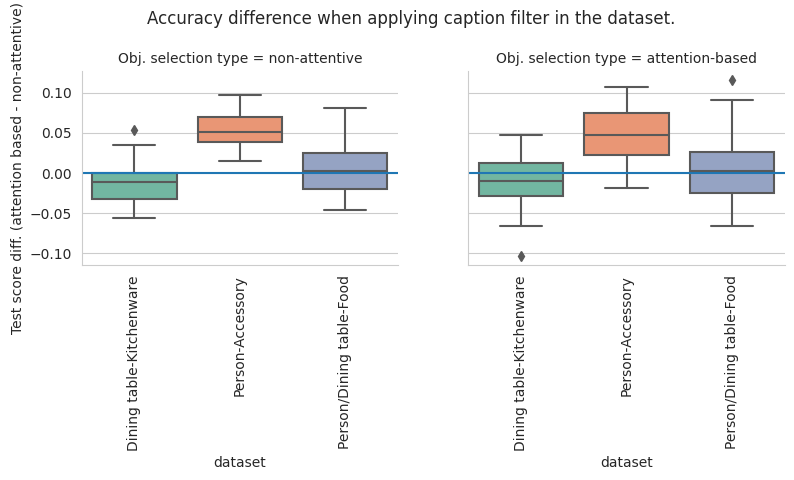

In [240]:
sns.set_style('whitegrid')
fg = sns.FacetGrid(caption_filter_diff, col="Obj. selection type", height=3.2, aspect=1.3, xlim=(-0.2, 0.2))
fg.fig.suptitle('Accuracy difference when applying caption filter in the dataset.')
ax = fg.map(sns.boxplot, 'dataset', 'Test score diff. (attention based - non-attentive)', palette="Set2")
ax.tick_params(axis='x', rotation=90)
for ax in fg.axes.flat:
    ax.axhline(y=0)
plt.savefig("../figures/figure_boxplot_caption_filter.png")
plt.show()

In [197]:
results_table_heat = results_table[["dataset", "object", "hidden_state_layer","token_strategy","test_score"]]
results_table_heat = results_table_heat.groupby(["dataset", "object", "token_strategy","hidden_state_layer"])
results_table_heat_df = results_table_heat.agg(np.max).reset_index()
results_table_heat_df

,dataset,object,token_strategy,hidden_state_layer,test_score
0,Dining table-Kitchenware,main,max_image,2,0.273585
1,Dining table-Kitchenware,main,max_image,3,0.323899
2,Dining table-Kitchenware,main,max_image,4,0.345912
3,Dining table-Kitchenware,main,max_image,5,0.292453
4,Dining table-Kitchenware,main,max_image,6,0.254717
...,...,...,...,...,...
235,Person/Dining table-Food,second,random_obj,7,0.590909
236,Person/Dining table-Food,second,random_obj,8,0.649746
237,Person/Dining table-Food,second,random_obj,9,0.659898
238,Person/Dining table-Food,second,random_obj,10,0.696970


In [198]:
results_table_heat_df["dataset_object"] = results_table_heat_df["dataset"] + "-" + results_table_heat_df["object"]

In [1]:
# # plotting a basic heatmap
# plt.figure(figsize=(8,6), tight_layout=True)
# hm = sns.heatmap(data=heatmap_data,
#                  annot=True,
#                  vmin=0.0,
#                  vmax=1.0,
#                  xticklabels=layers,
#                  yticklabels=token_strategy)
  
# # displaying the plotted heatmap
# plt.xlabel('Layers')
# plt.ylabel('Token strategy')
# plt.title('(Person, Accessory) decoding using Person token - Mean accuracy by token and layer')
# plt.show()

In [199]:
heatmap_data = copy.deepcopy(results_table_heat_df)

In [200]:
heatmap_data

,dataset,object,token_strategy,hidden_state_layer,test_score,dataset_object
0,Dining table-Kitchenware,main,max_image,2,0.273585,Dining table-Kitchenware-main
1,Dining table-Kitchenware,main,max_image,3,0.323899,Dining table-Kitchenware-main
2,Dining table-Kitchenware,main,max_image,4,0.345912,Dining table-Kitchenware-main
3,Dining table-Kitchenware,main,max_image,5,0.292453,Dining table-Kitchenware-main
4,Dining table-Kitchenware,main,max_image,6,0.254717,Dining table-Kitchenware-main
...,...,...,...,...,...,...
235,Person/Dining table-Food,second,random_obj,7,0.590909,Person/Dining table-Food-second
236,Person/Dining table-Food,second,random_obj,8,0.649746,Person/Dining table-Food-second
237,Person/Dining table-Food,second,random_obj,9,0.659898,Person/Dining table-Food-second
238,Person/Dining table-Food,second,random_obj,10,0.696970,Person/Dining table-Food-second


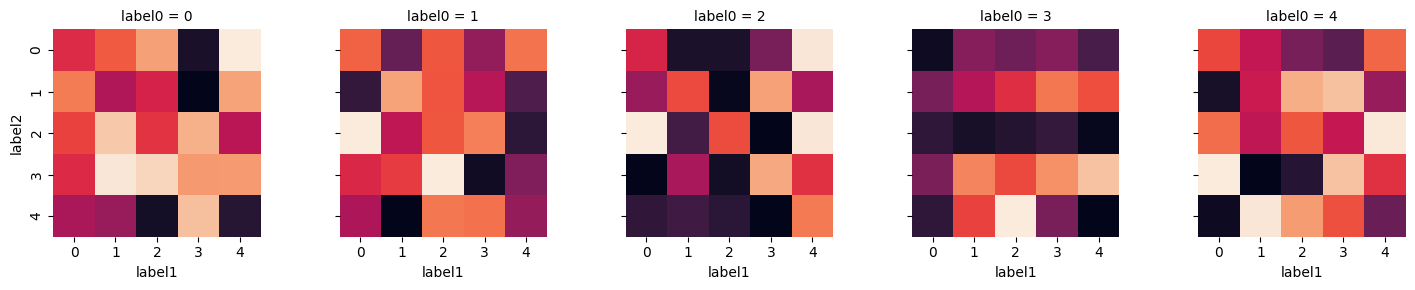

In [79]:
# Generate a set of sample data
np.random.seed(0)
indices = pd.MultiIndex.from_product((range(5), range(5), range(5)),
 names=('label0', 'label1', 'label2'))
data = pd.DataFrame(np.random.uniform(0, 100, size=len(indices)),
 index=indices, columns=('value',)).reset_index()

def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d = data.pivot(index=args[1], columns=args[0], values=args[2])
    sns.heatmap(d, **kwargs)

fg = sns.FacetGrid(data, col='label0')
fg.map_dataframe(draw_heatmap, 'label1', 'label2', 'value', cbar=False, square = True)
# get figure background color
facecolor=plt.gcf().get_facecolor()
for ax in fg.axes.flat:
    # set aspect of all axis
    ax.set_aspect('equal','box')
    # set background color of axis instance
#     ax.set_axis_bgcolor(facecolor)
plt.show()

/home/braian/anaconda3/envs/thesis-pytorch/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)


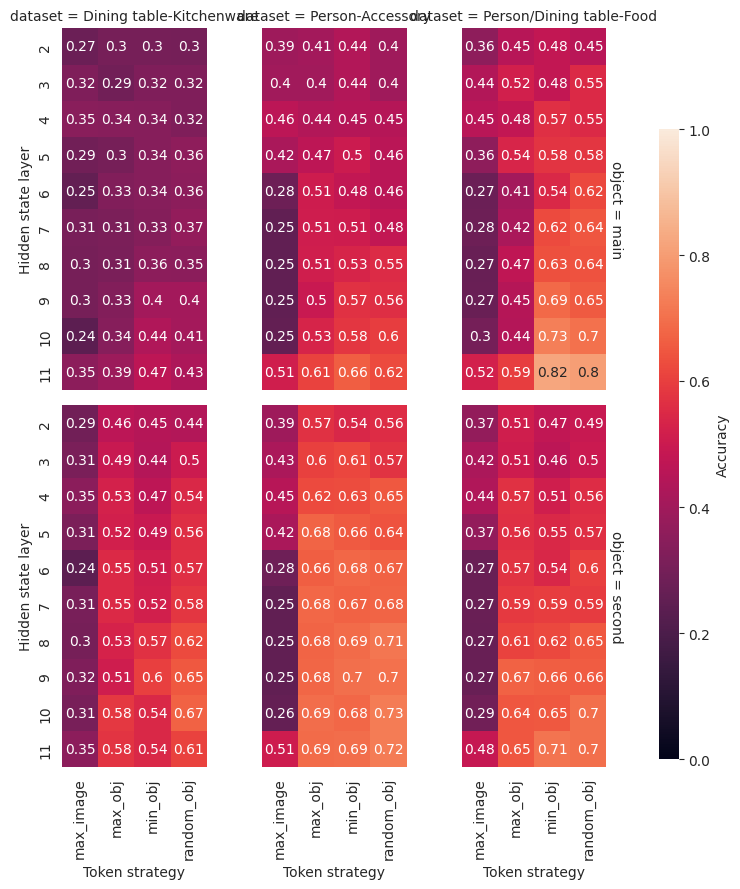

In [214]:
# task	object	token_strategy	hidden_state_layer
heatmap_data["Hidden state layer"] = heatmap_data["hidden_state_layer"]
heatmap_data["Token strategy"] = heatmap_data["token_strategy"]
token_strategy = heatmap_data["Token strategy"].unique().tolist()
layers = heatmap_data["Hidden state layer"].unique().tolist()
fg = sns.FacetGrid(heatmap_data, col='dataset', row='object',
                   sharex=True, 
                   height=4.5, 
                   aspect=0.5, 
                   margin_titles = True, ylim=(0.0,1.0), xlim=(0.0,1.0))
cbar_ax = fg.fig.add_axes([1, .15, .03, .7])
fg.map_dataframe(draw_heatmap,'Token strategy', 'Hidden state layer',  'test_score', 
                 cbar=True, square = True, annot=True,
                 vmin=0.0,
                 vmax=1.0,
                 xticklabels=token_strategy,
                 yticklabels=layers,
                 cbar_ax=cbar_ax, cbar_kws={'label': 'Accuracy'})
# get figure background color
facecolor=plt.gcf().get_facecolor()
for ax in fg.axes.flat:
    pass
    # set aspect of all axis
#     ax.set_aspect('equal','box')
    # set background color of axis instance
#     ax.set_axis_bgcolor(facecolor)
plt.show()

In [142]:
def plot_heat_map(data, filename="",aspect=1.70, title=""):
    token_strategy = data["Token strategy"].unique().tolist()
    layers = data["Hidden state layer"].unique().tolist()
    
#     fg = sns.FacetGrid(heatmap_data, col='task', row='object',sharex=False, height=2.5, aspect=1.75, margin_titles = True, ylim=(0.0,1.0), xlim=(0.0,1.0))
        
    fg = sns.FacetGrid(data, col='dataset', row='object',sharey=False, 
                       height=2.7, aspect=aspect,
#                        height=6, aspect=0.5,#vertical 
                       margin_titles = True, ylim=(0.0,1.0), xlim=(0.0,1.0))
    fg.fig.suptitle(title)
    cbar_ax = fg.fig.add_axes([1, .15, .03, .7])
    fg.map_dataframe(draw_heatmap, 'Hidden state layer', 'Token strategy', 'test_score', 
                     cbar=True, square = True, annot=True,
                     vmin=0.0,
                     vmax=1.0,
                     xticklabels=layers,
                     yticklabels=token_strategy,
                     cbar_ax=cbar_ax, cbar_kws={'label': 'Accuracy'})
    # get figure background color
    facecolor=plt.gcf().get_facecolor()
    for ax in fg.axes.flat:
        pass
        # set aspect of all axis
    #     ax.set_aspect('equal','box')
        # set background color of axis instance
    #     ax.set_axis_bgcolor(facecolor)
    if filename:
        plt.savefig(filename)
    plt.show()

/home/braian/anaconda3/envs/thesis-pytorch/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)


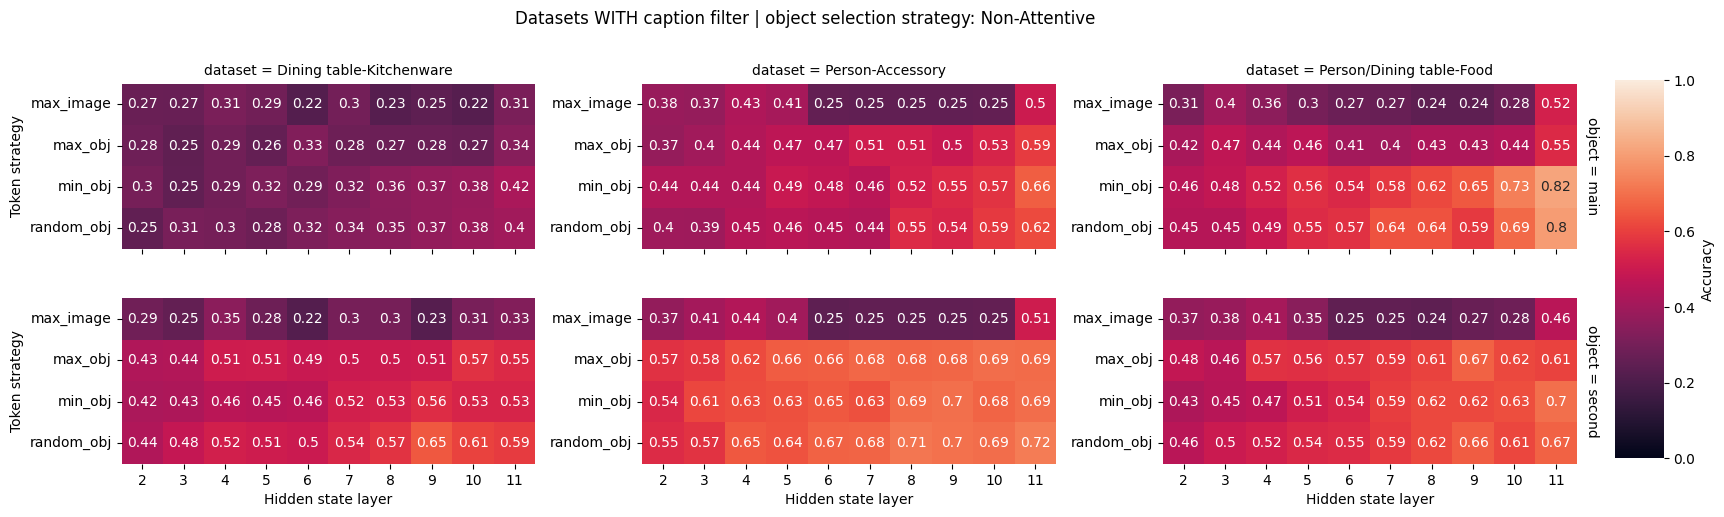

In [152]:
results_table_heat = copy.deepcopy(results_table[(results_table["caption_filter"]=="(cap)") & (results_table["mask_type"]=='3')])
results_table_heat["Hidden state layer"] = results_table_heat["hidden_state_layer"]
results_table_heat["Token strategy"] = results_table_heat["token_strategy"]
results_table_heat = results_table_heat[["dataset", "object", "Hidden state layer","Token strategy","test_score"]]
results_table_heat = results_table_heat.sort_values(by=["dataset", "object", "Hidden state layer","Token strategy","test_score"])
plot_heat_map(results_table_heat, "", aspect=2, title='Datasets WITH caption filter | object selection strategy: Non-Attentive')

/home/braian/anaconda3/envs/thesis-pytorch/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)


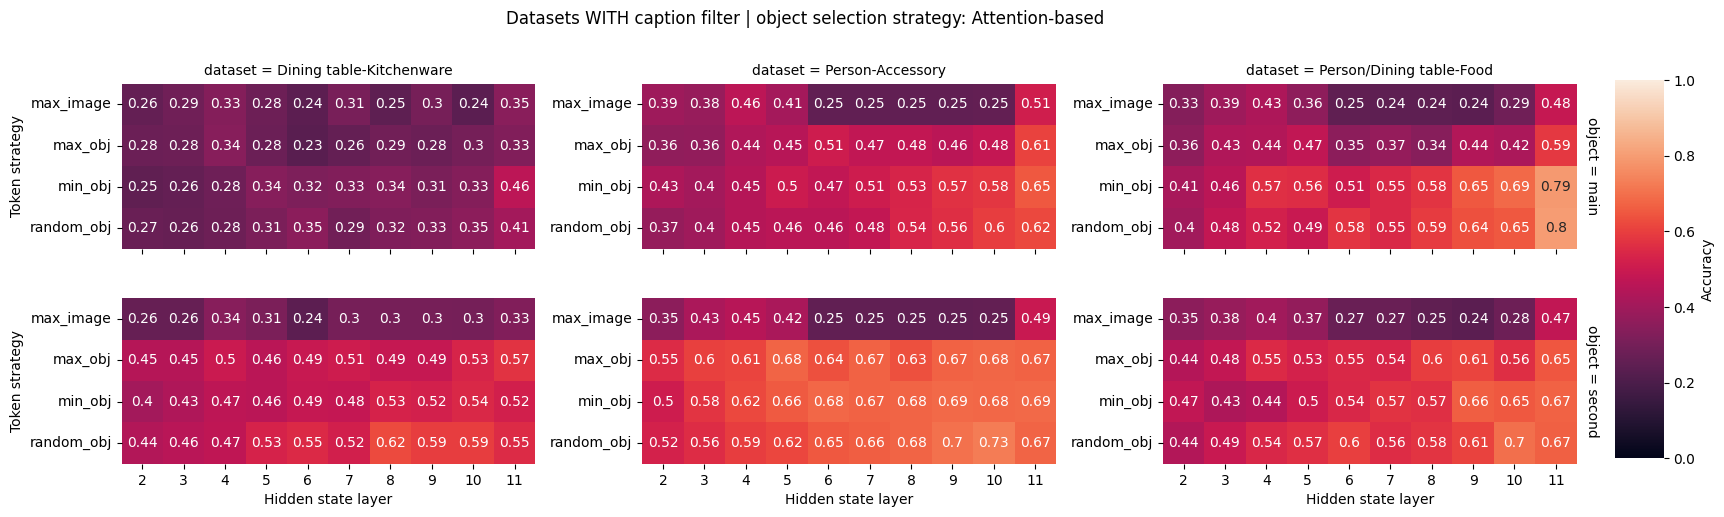

In [153]:
results_table_heat = copy.deepcopy(results_table[(results_table["caption_filter"]=="(cap)") & (results_table["mask_type"]=='4')])
results_table_heat["Hidden state layer"] = results_table_heat["hidden_state_layer"]
results_table_heat["Token strategy"] = results_table_heat["token_strategy"]
results_table_heat = results_table_heat.sort_values(by=["dataset", "object", "Hidden state layer","Token strategy","test_score"])
plot_heat_map(results_table_heat, title='Datasets WITH caption filter | object selection strategy: Attention-based', aspect=2)